# Assignment 3

* Gender: Gender of the individual

* Age: Age of the individual

* Height: Height of the individual

* Weight: Weight of the individual

* family_history_with_overweight: Whether the individual has a family member suffered or suffers from overweight

* FAVC: Frequency of consuming high-calorie foods

* FCVC: Frequency of of consuming vegetables

* NCP: Number of main meals per day

* CAEC: Frequency of eating any food between meals

* SMOKE: Whether the individual smoke

* CH2O: Amount of water consumed daily

* SCC: Whether the individual monitors their daily calories

* FAF: Frequency of having physical activity

* TUE: Time using technological devices (cell phone, videogames, television, computer and others)

* CALC: Frequency of consuming alcohol

* MTRANS: Mode of transportation used by the individual (e.g., walking, biking, public transportation, etc.).

* NObeyesdad: Obesity level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

SEED = 0
np.random.seed(SEED)

## Load, preprocess, split data

Load the dataset, preprocess the data (min max norm for numberical, one hot for categorical), and split to train and test sets

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=[
    'Gender', 
    'family_history_with_overweight', 
    'FAVC', 
    'CAEC', 
    'SMOKE', 
    'SCC', 
    'CALC', 
    'MTRANS', 
    'NObeyesdad'
])

# List of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

scaler = MinMaxScaler()

# Apply the scaler to the numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop(['NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'], axis=1)

y = df_encoded[['NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']]

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, random_state=SEED)

In [3]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1,0,...,0,0,0,1,0,0,0,0,1,0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1,0,...,0,0,0,1,0,0,0,0,1,0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1,0,...,0,0,0,1,0,0,0,0,1,0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1,0,...,0,0,0,1,0,0,0,0,1,0


## Obeysety Distribution

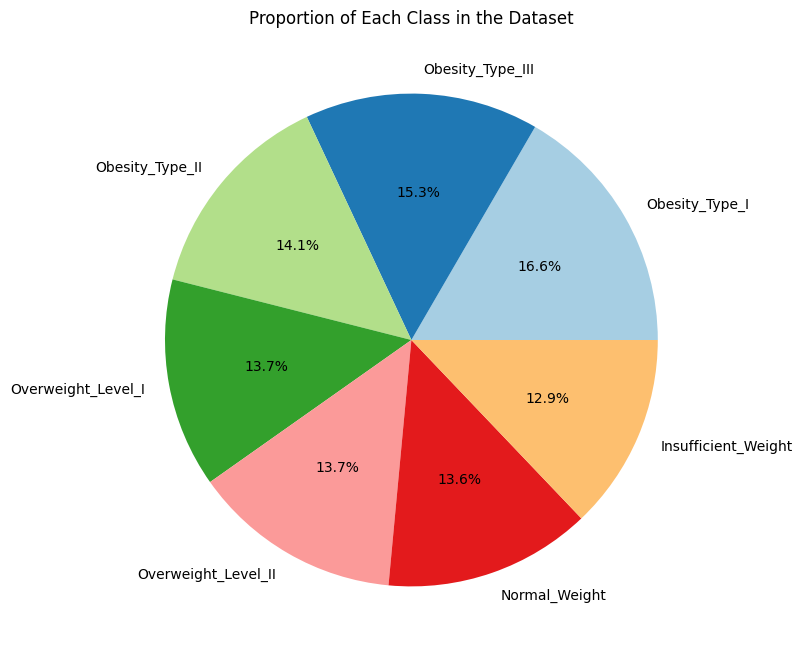

In [4]:
class_proportion = df['NObeyesdad'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 8))
class_proportion.plot(kind='pie', autopct='%1.1f%%', 
                      colors=plt.cm.Paired.colors, 
                      )
plt.title('Proportion of Each Class in the Dataset')
plt.ylabel('')
plt.show()

## Logistic Regression

The coefficients of the logistic regression model indicate the importance and influence of each feature on the obesity levels.

This helps identify which factors are significant predictors of obesity.

In [5]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

log_reg = LogisticRegression(random_state=SEED)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train.argmax(axis=1))

best_params = grid_search.best_params_

best_logistic = LogisticRegression(max_iter=1000, random_state=SEED,
                                   C=best_params['C'],
                                   penalty=best_params['penalty'],
                                   solver=best_params['solver'])

best_logistic.fit(X_train, y_train.argmax(axis=1))

y_pred_log = best_logistic.predict(X_test)

print("\nLogistic Regression\n")
print("Best Parameters:", best_params)
# print("Accuracy:", accuracy_score(y_test.argmax(axis=1), y_pred_log))
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), y_pred_log))
# print("Confusion Matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred_log))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Logistic Regression

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        90
           1       0.90      0.84      0.87        87
           2       0.97      0.95      0.96       103
           3       0.98      1.00      0.99        90
           4       0.96      0.99      0.98       101
           5       0.86      0.81      0.84        81
           6       0.86      0.87      0.86        82

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



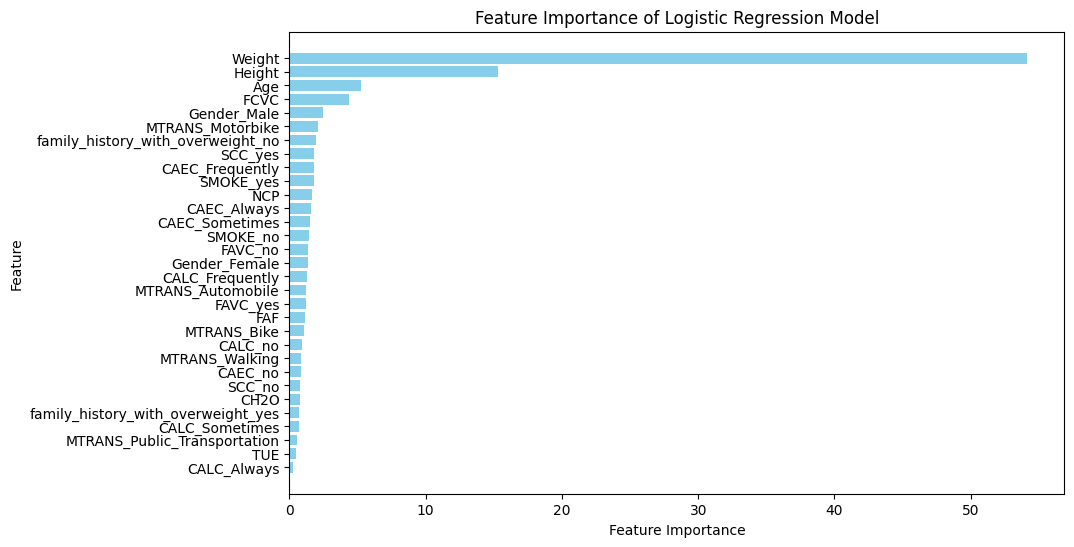

In [6]:
total_coefficients = np.sum(np.abs(best_logistic.coef_), axis=0)/7
sorted_indices = np.argsort(total_coefficients)
sorted_coefficients = total_coefficients[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Logistic Regression Model')
plt.show()

## Random Forest Classifier

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rf_clf = RandomForestClassifier(random_state=SEED)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train.argmax(axis=1))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [8]:
print("Random Forest Classifier\n")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred_rf = grid_search.predict(X_test)

print("Accuracy:\n",accuracy_score(y_test.argmax(axis=1), y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test.argmax(axis=1), y_pred_rf))
# Confusion Matrix gives an error
print("\nConfusion Matrix:\n",confusion_matrix(y_test.argmax(axis=1), y_pred_rf))

Random Forest Classifier

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9411154374713698
Accuracy:
 0.9321766561514195

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        90
           1       0.76      0.94      0.84        87
           2       0.96      0.97      0.97       103
           3       1.00      0.99      0.99        90
           4       1.00      1.00      1.00       101
           5       0.96      0.81      0.88        81
           6       0.92      0.88      0.90        82

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634


Confusion Matrix:
 [[ 81   9   0   0   0   0   0]
 [  4  82   0   0   0   0   1]
 [  0   1 100   0   0   1   1]
 [  0   0   1  89   0   0   0]
 [  0   0   0   0 101   0   0]
 [  0  11  


Feature Importance:
                                     Importance
Weight                                0.282776
Age                                   0.088659
Height                                0.086659
FCVC                                  0.078954
NCP                                   0.056175
FAF                                   0.047152
TUE                                   0.044151
CH2O                                  0.042537
Gender_Female                         0.037483
Gender_Male                           0.032312
family_history_with_overweight_yes    0.021123
CALC_Sometimes                        0.020716
family_history_with_overweight_no     0.020485
CAEC_Sometimes                        0.020358
CALC_no                               0.019563
MTRANS_Public_Transportation          0.017447
MTRANS_Automobile                     0.015999
CAEC_Frequently                       0.015741
FAVC_yes                              0.012219
FAVC_no                               

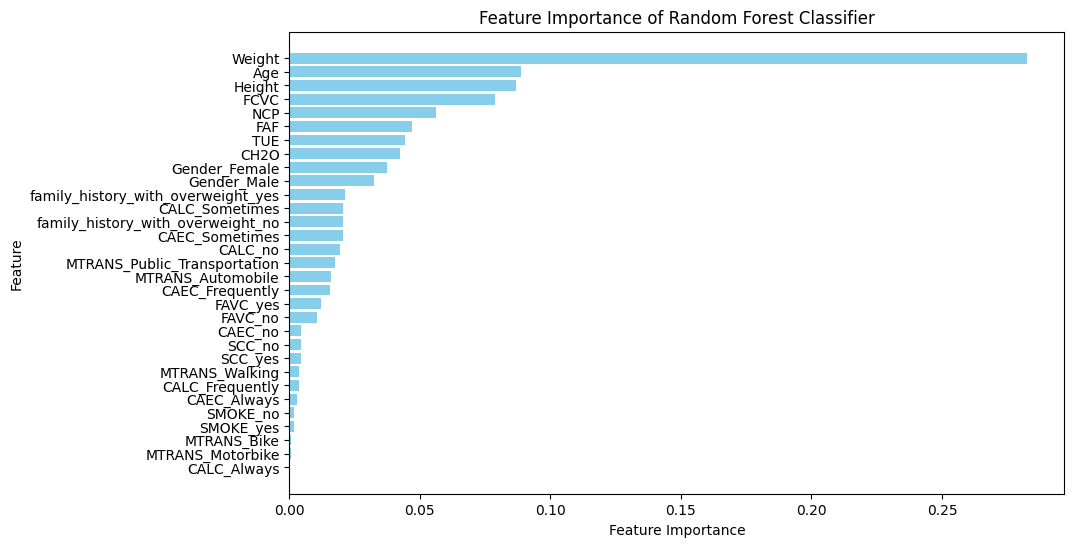

In [9]:
best_rf_clf = grid_search.best_estimator_
feature_importance = pd.DataFrame(best_rf_clf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
feature_importance_asc = feature_importance.sort_values('Importance', ascending=True)
print("\nFeature Importance:\n", feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_asc.index, feature_importance_asc['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

## SVM

In [10]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

svm_clf = SVC(random_state=SEED)

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train.argmax(axis=1))

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9255245075584059



SVM Classifier

Accuracy: 0.9274447949526814

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        90
           1       0.88      0.79      0.84        87
           2       0.98      0.97      0.98       103
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00       101
           5       0.84      0.83      0.83        81
           6       0.87      0.89      0.88        82

    accuracy                           0.93       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.93      0.93      0.93       634


Confusion Matrix:
 [[ 88   2   0   0   0   0   0]
 [ 11  69   0   0   0   7   0]
 [  0   0 100   0   0   0   3]
 [  0   0   0  90   0   0   0]
 [  0   0   0   0 101   0   0]
 [  0   6   0   0   0  67   8]
 [  0   1   2   0   0   6  73]]


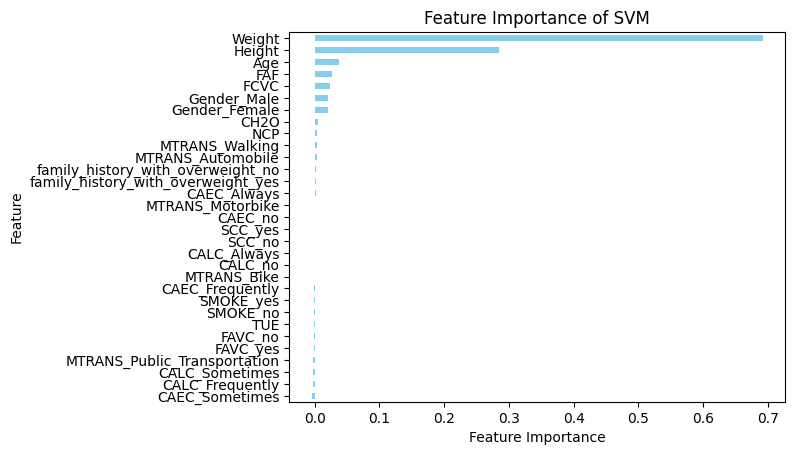

In [11]:
best_svm_clf = grid_search.best_estimator_
y_pred_svm = best_svm_clf.predict(X_test)

print("\nSVM Classifier\n")
print("Accuracy:", accuracy_score(y_test.argmax(axis=1), y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test.argmax(axis=1), y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred_svm))

result_svr = permutation_importance(best_svm_clf, X_test, y_test.argmax(axis=1), n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result_svr.importances_mean
feat_names = list(X.columns)

importance = pd.DataFrame(sorted_idx, index=feat_names, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', title='Feature Importance of SVM', color='skyblue', legend=False)
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.show()

## Neural Network

In [12]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 64, 32), activation='tanh', learning_rate='adaptive', learning_rate_init=0.001, max_iter=500, random_state=SEED)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

In [13]:
print(accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

0.9463722397476341
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.93      0.92      0.92        87
           2       0.98      0.95      0.97       103
           3       0.99      0.99      0.99        90
           4       0.99      0.99      0.99       101
           5       0.95      0.88      0.91        81
           6       0.96      0.93      0.94        82

   micro avg       0.97      0.95      0.96       634
   macro avg       0.96      0.95      0.96       634
weighted avg       0.97      0.95      0.96       634
 samples avg       0.95      0.95      0.95       634



c:\Users\epitt\miniconda3\envs\stat\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


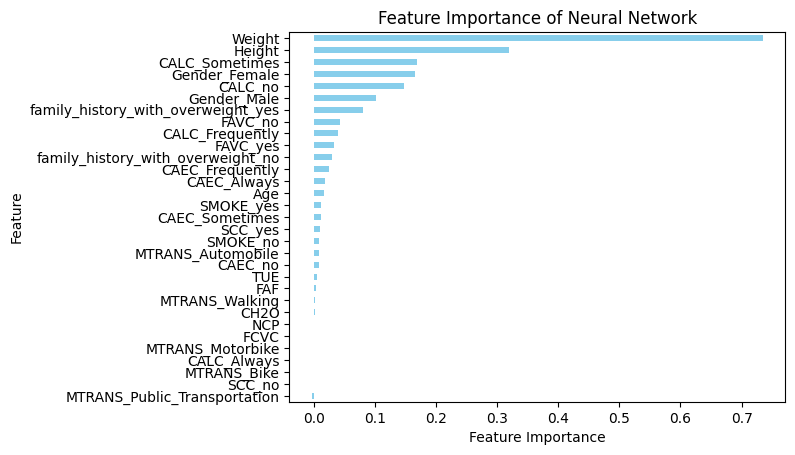

In [14]:
result_nn = permutation_importance(nn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result_svr.importances_mean
feat_names = list(X.columns)

importance = pd.DataFrame(sorted_idx, index=feat_names, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', title='Feature Importance of Neural Network', color='skyblue', legend=False)
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.show()

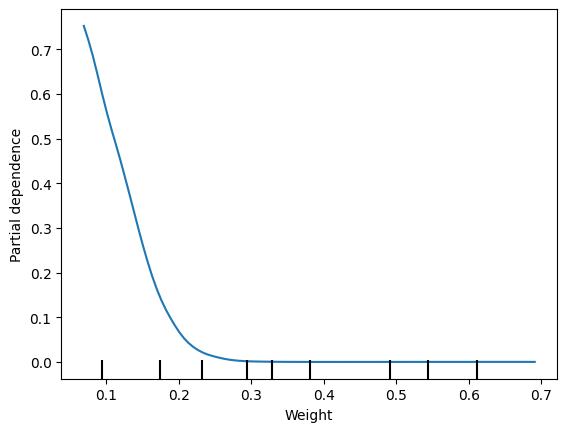

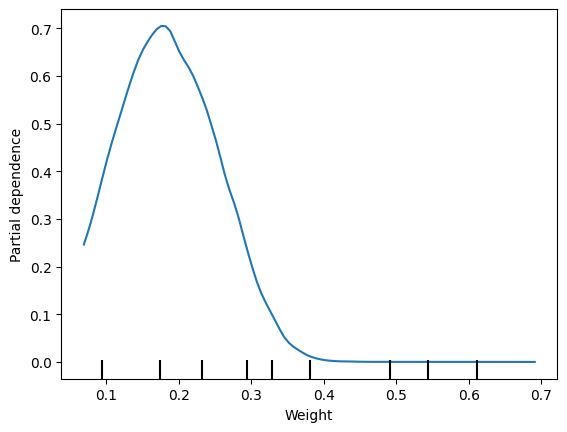

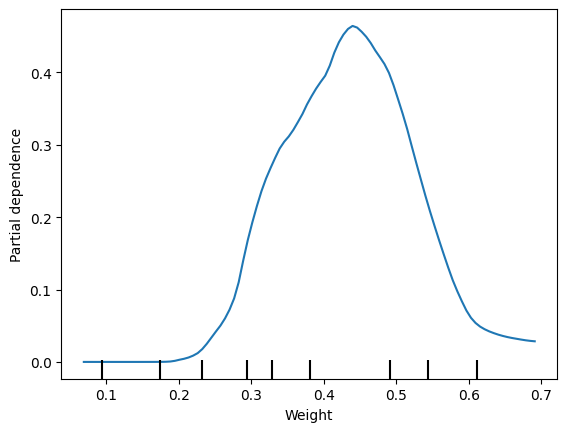

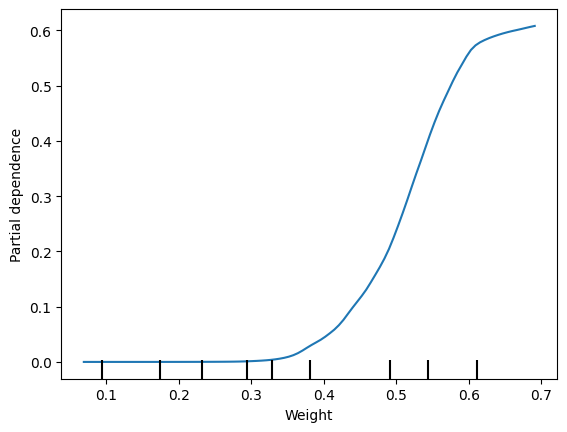

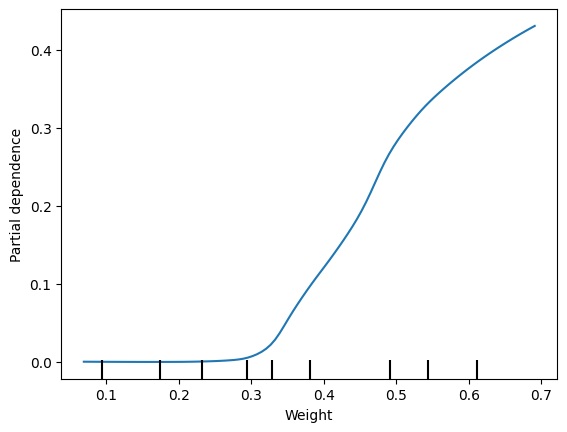

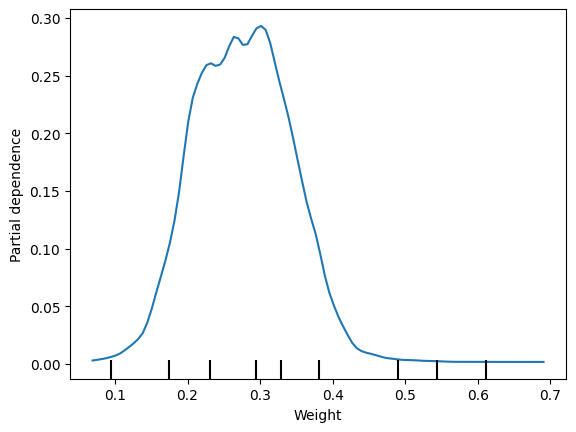

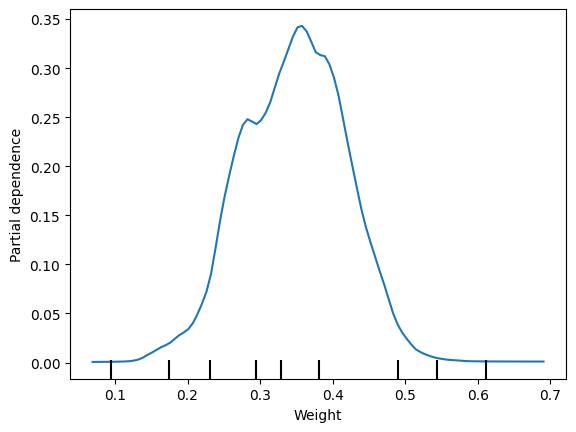

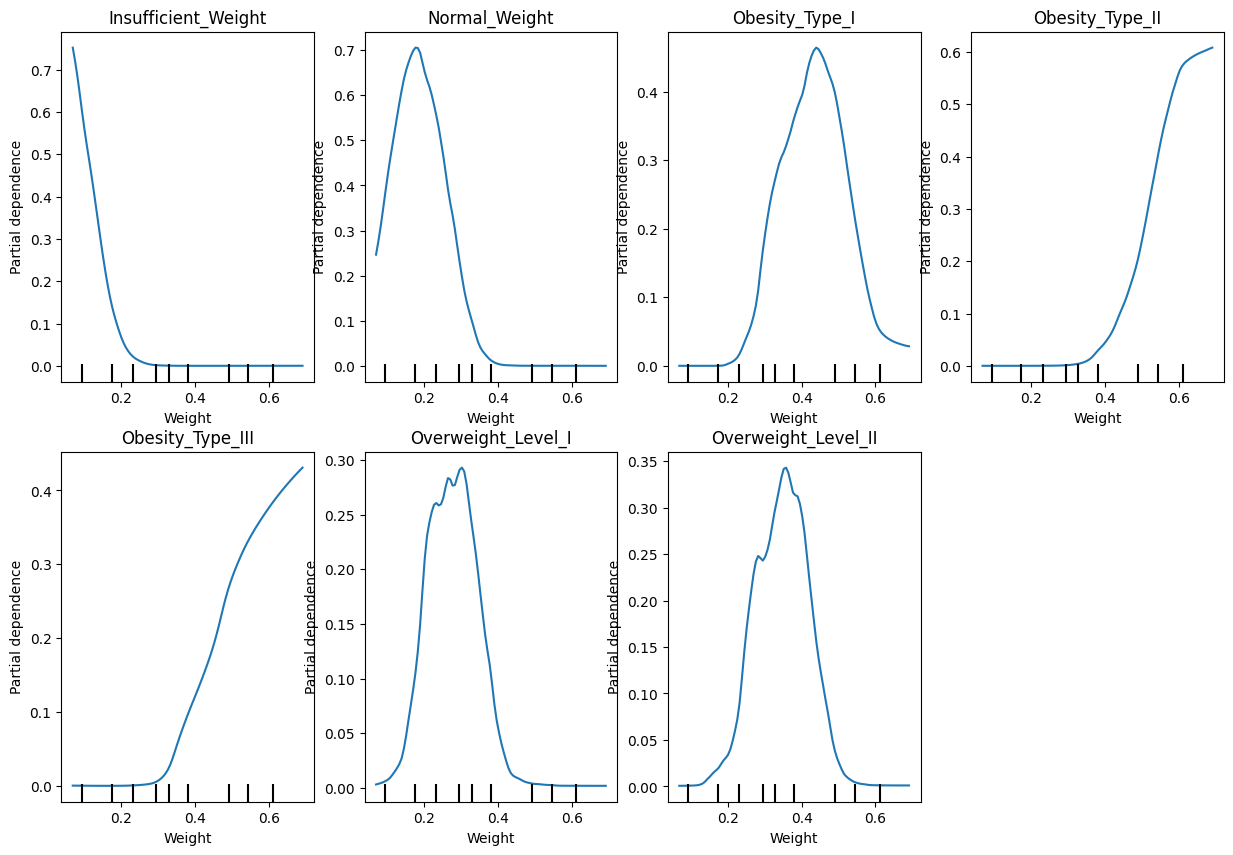

In [15]:
class_name = {i: y.columns[i].split('NObeyesdad_')[1]  for i in range(7)}
class_name
pdp = []
for i in range(7):
    pdp.append(PartialDependenceDisplay.from_estimator(estimator=nn_model, X=X_train, features=[2], target=i, feature_names=X.columns));

fig, ax = plt.subplots(2,4, figsize=(15, 10))
for i in range(7):
    pdp[i].plot(ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f'{class_name[i]}')
    ax[i//4, i%4].set_xlabel('Weight')
    ax[i//4, i%4].set_ylabel('')
fig.delaxes(ax[1,3])